A [recent post on](http://blogs.sciencemag.org/pipeline/archives/2016/07/27/maoecrystal-v-you-poor-people) In the Pipeline talked about a recent JACS communication on the total synthesis of the natural product maoecrystal V. The article is open access:
http://pubs.acs.org/doi/abs/10.1021/jacs.6b06623

Here's the ToC figure, which shows a sketch of the final product on the left:
![ToC Figure](http://pubs.acs.org/appl/literatum/publisher/achs/journals/content/jacsat/0/jacsat.ahead-of-print/jacs.6b06623/20160725/images/medium/ja-2016-066232_0004.gif)

Since I've been looking at how well the RDKit does at conformation generation for highly constrained systems, I thought this would be a nice example molecule to try out. I was also quite curious about the shape of that beast.

The first problem was getting the structure in. I wasn't completely confident in my ability to reproduce that sketch and JACS, of course, doesn't have a way to provide structures in electronic form. Fortunately the authors had solved x-ray structures of their final product and a bunch of intermediates and the CIF files were in the supplementary material. So I converted the CIF to a mol file with OpenBabel (hopefully using the correct CIF file... they aren't particularly well labelled as far as I can tell) and got started from there.


In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
print(rdBase.rdkitVersion)
import os,time
print( time.asctime())

2016.09.1.dev1
Wed Jul 27 18:48:35 2016


We'll use py3Dmol to show structures in the notebook

In [5]:
import py3Dmol
def drawit(m,p=None,confId=-1):
        mb = Chem.MolToMolBlock(m,confId=confId)
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

Start by reading in the mol file and displaying that:

In [8]:
mExpt = Chem.MolFromMolFile("/home/glandrum/Downloads/paper/ja6b06623_si_010.cif.mol",removeHs=False)
drawit(mExpt)

Now generate a conformer for the molecule:

In [14]:
m = Chem.MolFromMolFile("/home/glandrum/Downloads/paper/ja6b06623_si_010.cif.mol",removeHs=False)
Chem.AssignAtomChiralTagsFromStructure(m)
AllChem.EmbedMolecule(m,useExpTorsionAnglePrefs=True,useBasicKnowledge=True)
drawit(m)

At least by eye that looks very close, let's check the RMS:

In [20]:
print("RMS: ",AllChem.GetBestRMS(m,mExpt),
      "Heavy Atom RMS:",
      AllChem.GetBestRMS(Chem.RemoveHs(m),Chem.RemoveHs(mExpt)))

RMS:  0.6165388593927497 Heavy Atom RMS: 0.18186257676731582


Not bad! But then, this is a highly constrained structure.

Because we can, let's look at the two structures superimposed:

In [21]:
AllChem.AlignMol(m,mExpt)
mb = Chem.MolToMolBlock(m)
mbExpt = Chem.MolToMolBlock(mExpt)
p = py3Dmol.view(width=400,height=400)
p.removeAllModels()
p.addModel(mb,'sdf')
p.addModel(mbExpt,'sdf')

p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

Finally, a bit of 2D work. 

Just to have it, here's the SMILES for maoecrystal V 

In [12]:
Chem.MolToSmiles(Chem.RemoveHs(m),True)

'C[C@H]1C(=O)[C@@]23CC[C@@H]1C[C@@]21O[C@@H]2C(C)(C)C=CC(=O)[C@]23COC1=O'

Let's see how well the RDKit's 2D coordinate generation works here:

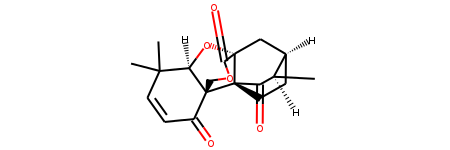

In [13]:
Chem.MolFromSmiles('C[C@H]1C(=O)[C@@]23CC[C@@H]1C[C@@]21O[C@@H]2C(C)(C)C=CC(=O)[C@]23COC1=O')

Not great, but definitely not as bad as I had expected.